
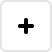
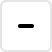
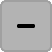
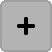
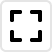
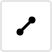
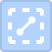

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete

LetsPlot.setup_html()

In [2]:
mpg = pd.read_csv ("https://github.com/JetBrains/lets-plot/raw/master/docs/examples/data/mpg.csv")

In [3]:
p = ggplot(mpg) + theme(axis_title_x='blank')

In [4]:

p1 = p + ggtitle("default") + geom_boxplot( aes('class','hwy'))

p2 = (p + ggtitle("alphabetically") 
            + geom_boxplot(aes(as_discrete('class',order=1), 'hwy')))
p3 = (p + ggtitle("middle ↑") \
                   + geom_boxplot(aes(as_discrete('class',order=1, order_by='..middle..'), 'hwy')))
p4 = (p + ggtitle("middle ↓") \
                   + geom_boxplot(aes(as_discrete('class',order=-1, order_by='..middle..'), 'hwy')))
p5 = (p + ggtitle("ymax ↑") \
                   + geom_boxplot(aes(as_discrete('class',order=1, order_by='..ymax..'), 'hwy')))
p6 = (p + ggtitle("ymax ↓") \
                   + geom_boxplot(aes(as_discrete('class',order=-1, order_by='..ymax..'), 'hwy')))
p7 = (p + ggtitle("ymin ↑") \
                   + geom_boxplot(aes(as_discrete('class',order=1, order_by='..ymin..'), 'hwy')))
p8 = (p + ggtitle("ymin ↓") \
                   + geom_boxplot(aes(as_discrete('class',order=-1, order_by='..ymin..'), 'hwy')))


w, h = 470, 300

bunch = GGBunch()

bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.add_plot(p5, 0, h*2, w, h)
bunch.add_plot(p6, w, h*2, w, h)
bunch.add_plot(p7, 0, h*3, w, h)
bunch.add_plot(p8, w, h*3, w, h)

bunch.show()

In [5]:
ordered_class = as_discrete('class', order=1)

p1 = (p + ggtitle("x='class', color='class'") 
            + geom_boxplot(aes('class', 'hwy', color='class'))
     )

p3 = (p + ggtitle("x=as_discrete('class', order=1), color='class'") 
            + geom_boxplot(aes(ordered_class, 'hwy', color='class'))
     )

p4 = (p + ggtitle("x=as_discrete('class', order=1), color=as_discrete('class')") 
            + geom_boxplot(aes(ordered_class, 'hwy', color=as_discrete('class')))
     )


p5 = p + ggtitle("x='class', color='drv'") + geom_boxplot(aes('class','hwy', color='drv'))

p7 = (p + ggtitle("x=as_discrete('class', order=1), color=as_discrete('drv', order=1)") 
            + geom_boxplot(aes(
                as_discrete('class', order=1), 'hwy',  
                color=as_discrete('drv', order=1)))
     )

p8 = (p + ggtitle("x=as_discrete('class', order_by='..middle..')") 
            + geom_boxplot(aes(
                as_discrete('class', order_by='..middle..', order=1), 'hwy', color='drv'))
     )


bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.add_plot(p5, 0, h*2, w, h)
bunch.add_plot(p7, 0, h*3, w, h)
bunch.add_plot(p8, w, h*3, w, h)
bunch.show()

In [6]:
        
p1 = (ggplot(mpg, aes('class', 'hwy')) + 
         geom_crossbar(aes(color='class'), stat='boxplot') +  
         scale_color_brewer(type='qual', palette='Dark2') + 
         ggtitle('default'))

p2 = (ggplot(mpg, aes(x=as_discrete('class', order_by="..middle..", order=1), y = 'hwy')) + 
         geom_crossbar(aes(color='class'), stat='boxplot') + 
         scale_color_brewer(type='qual', palette='Dark2') +
         ggtitle('middle ↑, order option also to \'color\'') )

p3 = (ggplot(mpg, aes(x=as_discrete('class', order_by="..middle.."), y = 'hwy')) + 
         geom_crossbar(aes(color=as_discrete('class', order=1)), stat='boxplot') +
         scale_color_brewer(type='qual', palette='Dark2') + 
         ggtitle('\'class\' with \'order_by\' + \'class\' with \'order\': options are combined') )

bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)

bunch

In [7]:
p1 = (p + ggtitle("default") + geom_bar(aes('class', 'hwy')))

p2 = (p + ggtitle("alphabetically") 
               + geom_bar(aes(as_discrete('class', order=1), 'hwy')))


p3 = (p + ggtitle("y ↓") 
               + geom_bar(aes(as_discrete('class', order_by='hwy'), 'hwy')))
p4 = (p + ggtitle("y ↑") 
               + geom_bar(aes(as_discrete('class', order_by='hwy', order=1), 'hwy')))

bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.show()

In [8]:
# geom_bar

p1 = (p + ggtitle("default") + geom_bar(aes('manufacturer', fill='class')))

p2 = (p + ggtitle("x alphabetically") 
               + geom_bar(aes(as_discrete('manufacturer', order=1), fill='class')))


p3 = (p + ggtitle("x alphabetically + sampling_pick(4)") 
               + geom_bar(aes(as_discrete('manufacturer', order=1), fill='class'), 
                         sampling=sampling_pick(4)))

p4 = (p + ggtitle("fill alphabetically") 
               + geom_bar(aes('manufacturer', fill=as_discrete('class',order=1))))

p5 = (p + ggtitle("x and fill alphabetically") 
               + geom_bar(aes(as_discrete('manufacturer', order=1), fill=as_discrete('class',order=1))))

p6 = (p + ggtitle("x by count (sum is taken)") 
               + geom_bar(aes(as_discrete('manufacturer',order_by='..count..'), fill='class')))


bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, 0, h, w, h)
bunch.add_plot(p3, w, h, w, h)
bunch.add_plot(p4, 0, h*2, w, h)
bunch.add_plot(p5, w, h*2, w, h)
bunch.add_plot(p6, 0, h*3, w, h)
bunch.show()

In [9]:
pp = ggplot(mpg, aes(x='fl', fill='drv'))
p1 = pp + geom_bar() + ggtitle('Default')
p2 = pp + geom_bar(position='dodge') + ggtitle("With Dodge Position")

p_order1 = ggplot(mpg, aes(x=as_discrete('fl',order=1), fill=as_discrete('drv',order=1)))
title1 = ggtitle('x and fill alphabetically')
p3 = p_order1 + geom_bar() + title1
p4 = p_order1 + geom_bar(position='dodge') + title1

p_order2 = ggplot(mpg, aes(x=as_discrete('fl',order_by="..count.."), fill='drv'))
title2 = ggtitle('x by count')
p5 = p_order2 + geom_bar() + title2
p6 = p_order2 + geom_bar(position='dodge') + title2


bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.add_plot(p5, 0, h*2, w, h)
bunch.add_plot(p6, w, h*2, w, h)
bunch

In [10]:
# diamonds

diamonds = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')

In [11]:
pd = ggplot(diamonds)

p1 = pd + geom_bar(aes('cut', fill = 'clarity')) + ggtitle('Default')
p2 = pd + geom_bar(aes('cut', fill = 'clarity'), position = 'fill') + ggtitle('position=\'fill\'')

p3 = pd + ggtitle('x and fill alphabetically') \
   + geom_bar(aes(as_discrete('cut',order=1), fill = as_discrete('clarity',order=1)), position = 'fill') 
p4 = pd + ggtitle('x by count') \
        + geom_bar(aes(as_discrete('cut',order_by='..count..'), 
                       fill = as_discrete('clarity',order=1)),
                   position = 'fill')

p5 = pd + geom_bar(aes('cut', fill = 'clarity'), position = 'dodge') + ggtitle('position=\'dodge\'')
p6 = pd + ggtitle('x by count and fill alphabetically') \
        + geom_bar(aes(as_discrete('cut',order_by='..count..', order=1),
                      fill = as_discrete('clarity',order=1)),
                   position = 'dodge')


bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch.add_plot(p3, 0, h, w, h)
bunch.add_plot(p4, w, h, w, h)
bunch.add_plot(p5, 0, h*2, w, h)
bunch.add_plot(p6, w, h*2, w, h)
bunch